pip install pillow
pip install opencv-python
pip install numpy
pip install matplotlib

Convert The Images To standar Format '.jpeg'


In [9]:
import os
from PIL import Image

def convert_to_jpeg(image_path):
    # Open the image
    img = Image.open(image_path)
    
    # Check if the image is already in JPEG format
    if img.format == 'JPEG':
        print(f"Skipping {image_path}, already in JPEG format.")
        return
    
    # Convert image to RGB mode if it's in a different mode
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    # Create the output JPEG file path
    output_path = os.path.splitext(image_path)[0] + '.jpg'
    
    # Convert and save as JPEG
    img.save(output_path, 'JPEG')
    
    print(f"Converted {image_path} to JPEG format.")

def batch_convert_to_jpeg(folder_path):
    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if filename.lower().endswith(('.png', '.tiff', '.tif', '.bmp', '.gif')):
            image_path = os.path.join(folder_path, filename)
            print(f"Converting {image_path}...")
            convert_to_jpeg(image_path)

# Example usage
folder_path = "C:/Users/Haseeb Raza/Desktop/Image Processing/images"
batch_convert_to_jpeg(folder_path)


Converting C:/Users/Haseeb Raza/Desktop/Image Processing/images\imagenS8.png...
Converted C:/Users/Haseeb Raza/Desktop/Image Processing/images\imagenS8.png to JPEG format.
Converting C:/Users/Haseeb Raza/Desktop/Image Processing/images\lab03_normalcd3_patient434_SR_2_IM00035.tif...
Converted C:/Users/Haseeb Raza/Desktop/Image Processing/images\lab03_normalcd3_patient434_SR_2_IM00035.tif to JPEG format.
Converting C:/Users/Haseeb Raza/Desktop/Image Processing/images\normal4_patient376_SR_2_IM00029 (1).tif...
Converted C:/Users/Haseeb Raza/Desktop/Image Processing/images\normal4_patient376_SR_2_IM00029 (1).tif to JPEG format.
Converting C:/Users/Haseeb Raza/Desktop/Image Processing/images\normalcd3_patient434_SR_2_IM00020.tif...
Converted C:/Users/Haseeb Raza/Desktop/Image Processing/images\normalcd3_patient434_SR_2_IM00020.tif to JPEG format.
Converting C:/Users/Haseeb Raza/Desktop/Image Processing/images\normalcd3_patient434_SR_2_IM00024.tif...
Converted C:/Users/Haseeb Raza/Desktop/Im

Code will Edit the image and show the Histrogram

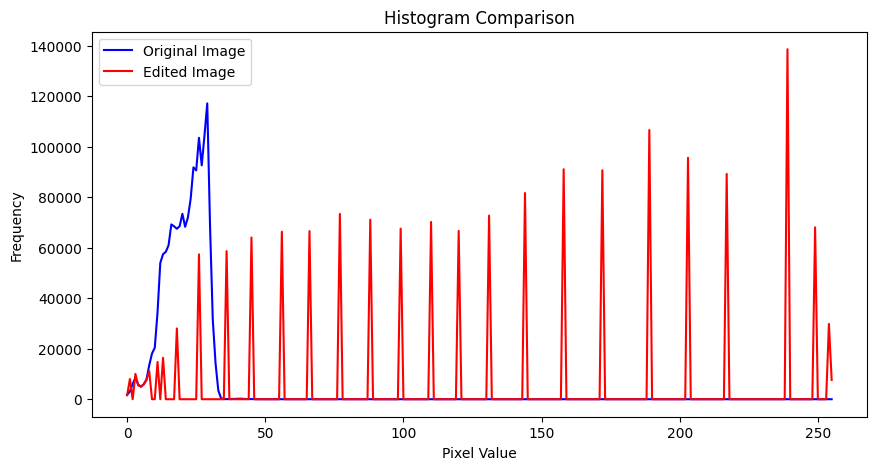

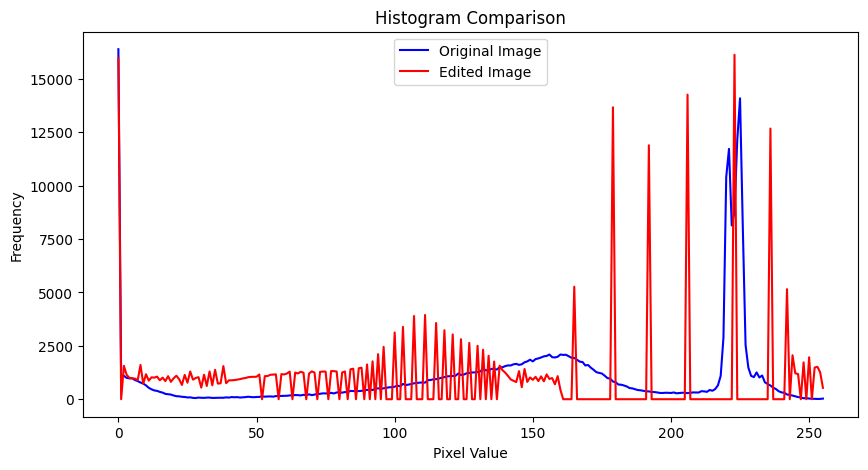

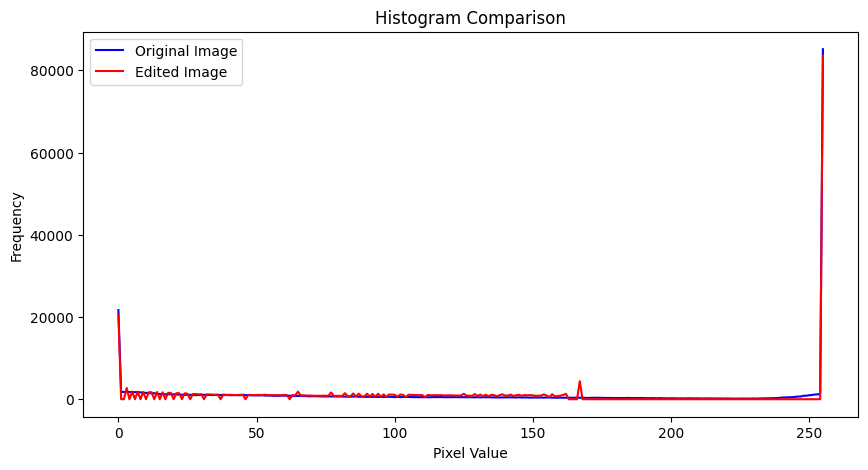

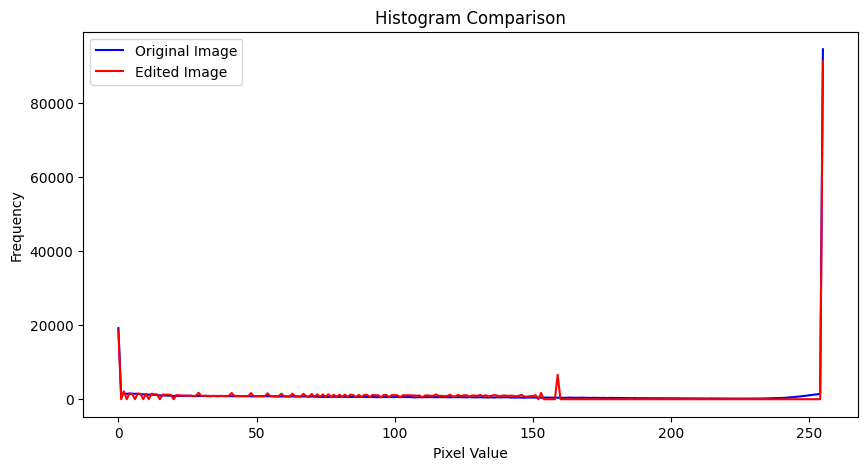

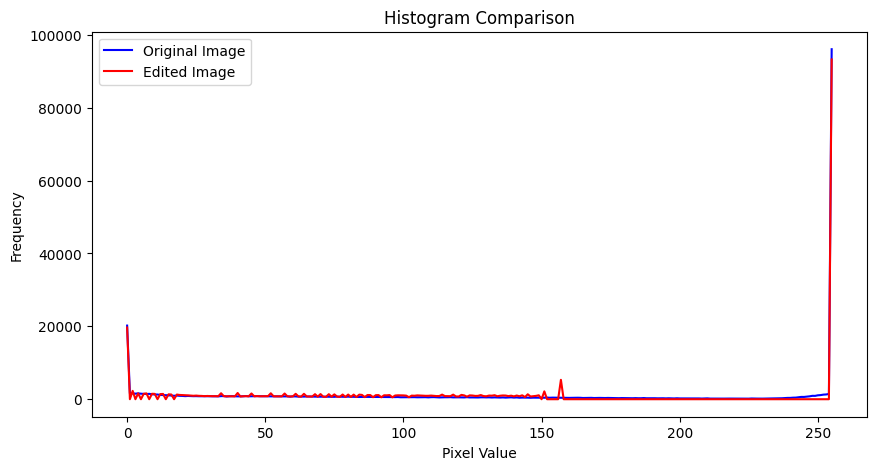

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def denoise_image(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply non-local means denoising
    denoised_image = cv2.fastNlMeansDenoising(gray_image, None, 10, 7, 21)
    
    return denoised_image

def correct_image(image):
    # Apply histogram equalization for contrast correction
    equalized_image = cv2.equalizeHist(image)
    
    return equalized_image

def compare_histograms(original_image, edited_image):
    # Compute histograms
    original_hist = cv2.calcHist([original_image], [0], None, [256], [0,256])
    edited_hist = cv2.calcHist([edited_image], [0], None, [256], [0,256])
    
    # Plot histograms
    plt.figure(figsize=(10, 5))
    plt.plot(original_hist, color='blue', label='Original Image')
    plt.plot(edited_hist, color='red', label='Edited Image')
    plt.title('Histogram Comparison')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

def process_folder(folder_path):
    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.jpg'):
            # Read image
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            
            # Denoise image
            denoised_image = denoise_image(image)
            
            # Correct image
            corrected_image = correct_image(denoised_image)
            
            # Compare histograms
            compare_histograms(image, corrected_image)
            
            # Display images
            cv2.imshow('Original Image', image)
            cv2.imshow('Edited Image', corrected_image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

# Example usage
folder_path = 'C:/Users/Haseeb Raza/Desktop/Image Processing/Converted_images_jpeg'
process_folder(folder_path)
